In [5]:
!pip install numpy
!pip install matplotlib
!pip install scipy
!pip install mpl_toolkits


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement mpl_toolkits (from versions: none)

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for mpl_toolkits


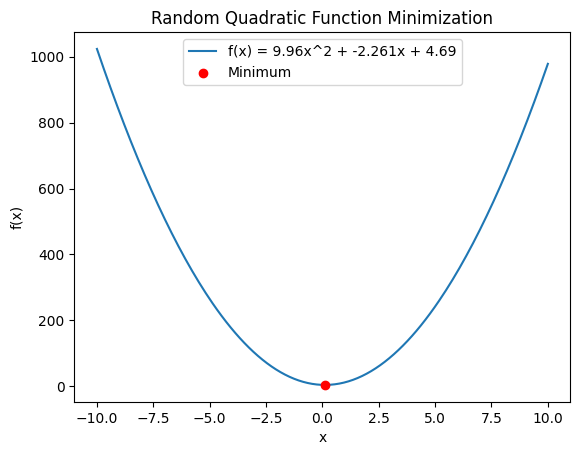

Random coefficients: a = 9.96 , b = -2.261 , c = 4.69
Best Minimum Found: [0.11350401] with function value: 4.561683709839358


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

a = np.round(np.random.uniform( 2 , 10), 3)
b = np.round(np.random.uniform(-10, 10), 3)
c = np.round(np.random.uniform(-10, 10), 3)

def quadratic(x):
    return a * x**2 + b * x + c

result = minimize(quadratic, x0=0)

x_vals = np.linspace(-10, 10, 200)
y_vals = quadratic(x_vals)

plt.figure()
plt.plot(x_vals, y_vals, label=f"f(x) = {a}x^2 + {b}x + {c}")
plt.scatter(result.x, result.fun, color="red", label="Minimum", zorder=5)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Random Quadratic Function Minimization")
plt.legend()
plt.show()

print("Random coefficients: a =", a, ", b =", b, ", c =", c)
print("Best Minimum Found:", result.x, "with function value:", result.fun)


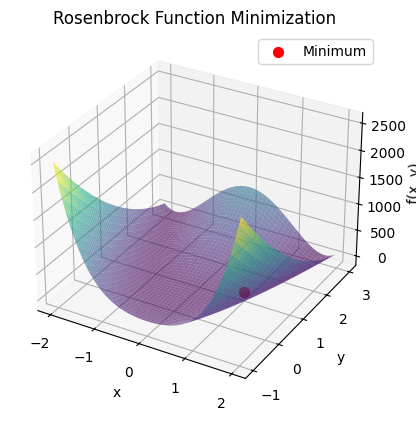

In [7]:
from mpl_toolkits.mplot3d import Axes3D

def rosenbrock(x):
    a, b = 1, 100
    return (a - x[0])**2 + b * (x[1] - x[0]**2)**2

result = minimize(rosenbrock, x0=[0, 0])

x_vals = np.linspace(-2, 2, 100)
y_vals = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = rosenbrock([X, Y])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap="viridis", alpha=0.6)
ax.scatter(result.x[0], result.x[1], result.fun, color="red", label="Minimum", s=50)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")
plt.title("Rosenbrock Function Minimization")
plt.legend()
plt.show()


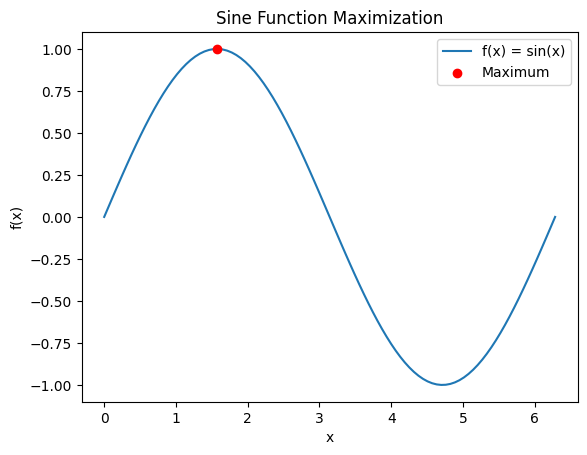

In [8]:
# Define the sine function for maximization
def negative_sine(x):
    return -np.sin(x)

# Perform minimization to find the maximum of sine
result = minimize(negative_sine, x0=2)

# Generate data for plotting
x_vals = np.linspace(0, 2 * np.pi, 100)
y_vals = np.sin(x_vals)

# Plot
plt.figure()
plt.plot(x_vals, y_vals, label="f(x) = sin(x)")
plt.scatter(result.x, -result.fun, color="red", label="Maximum", zorder=5)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Sine Function Maximization")
plt.legend()
plt.show()


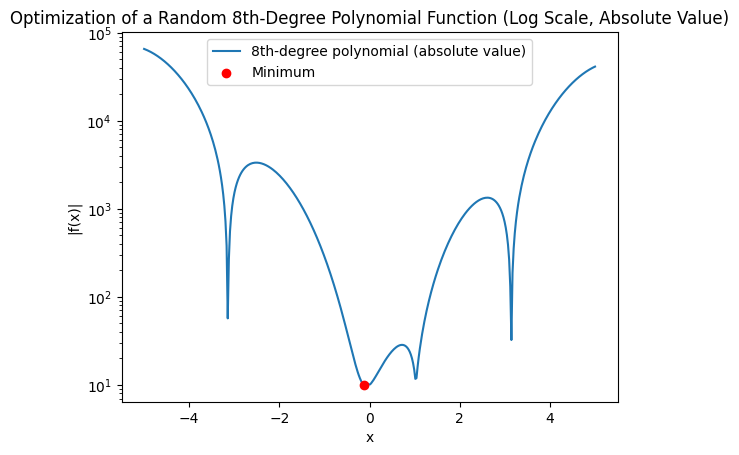

Best Minimum Found: [-0.13072826] with function value: 10.000000073976327


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Generate random coefficients for an 8th-degree polynomial
coefficients = np.random.uniform(-10, 10, 5)  # Random coefficients between -10 and 10

# Define the polynomial function with absolute values
def complex_polynomial(x):
    return 10+ 10*abs( np.sin(x) * sum(c * x**i for i, c in enumerate(coefficients)))

# Use multiple starting points to try to find a global minimum
starting_points = np.linspace(-5, 5, 10)
best_result = None
for start in starting_points:
    result = minimize(complex_polynomial, x0=start)
    if best_result is None or result.fun < best_result.fun:
        best_result = result

# Generate data for plotting
x_vals = np.linspace(-5, 5, 400)
y_vals = [complex_polynomial(x) for x in x_vals]

# Plot the function as a line
plt.figure()
plt.plot(x_vals, y_vals, label="8th-degree polynomial (absolute value)")
plt.scatter(best_result.x, best_result.fun, color="red", label="Minimum", zorder=5)
plt.xlabel("x")
plt.ylabel("|f(x)|")
plt.yscale("log")  # Set y-axis to logarithmic scale
plt.title("Optimization of a Random 8th-Degree Polynomial Function (Log Scale, Absolute Value)")
plt.legend()
plt.show()

print("Best Minimum Found:", best_result.x, "with function value:", best_result.fun)




---



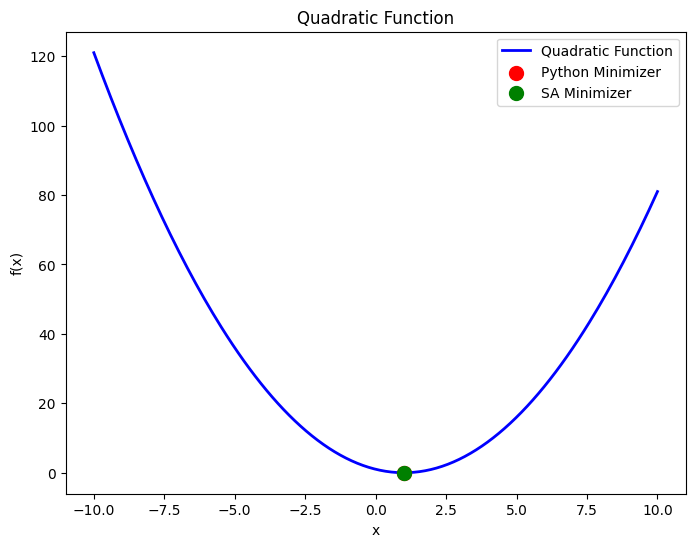

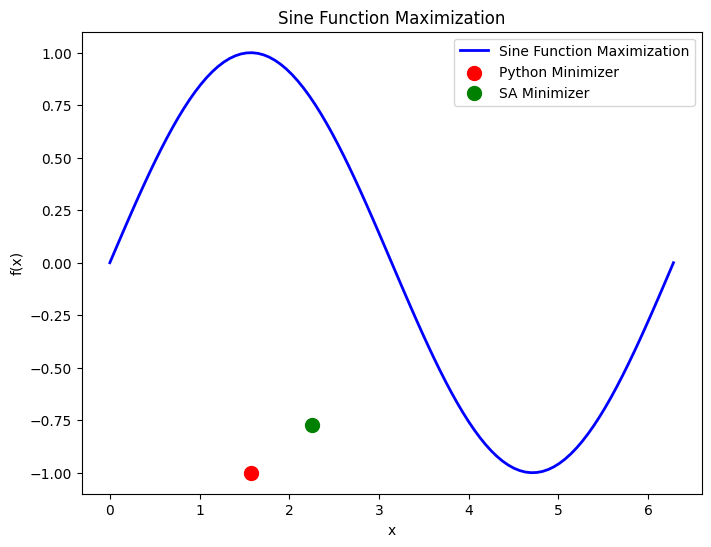

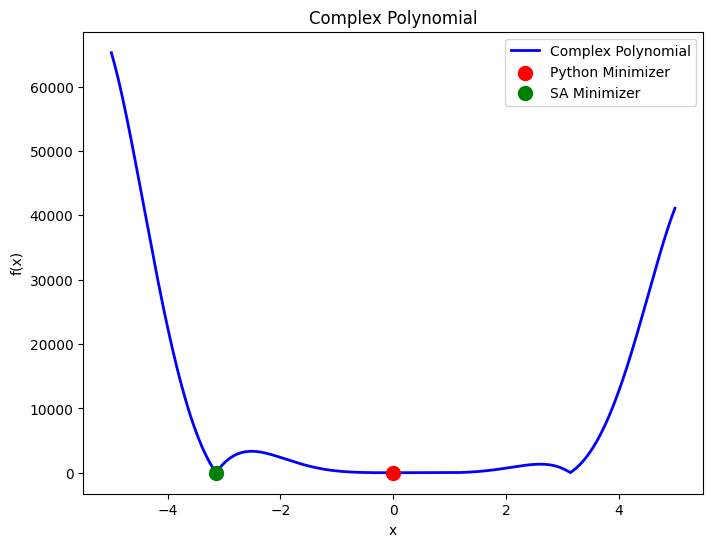

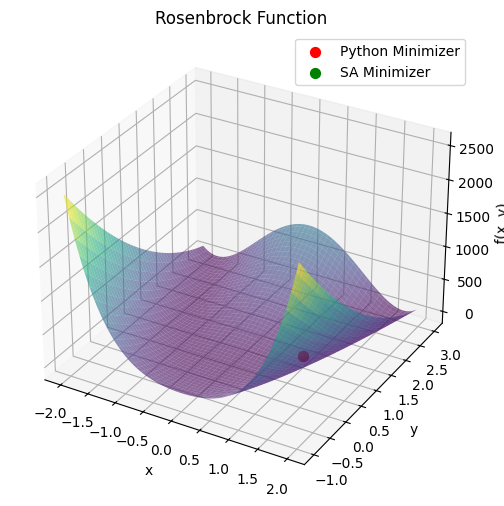

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Define functions for minimization
def quadratic(x):
    return x[0] ** 2 - 2 * x[0] + 1

def rosenbrock(x):
    a, b = 1, 100
    return (a - x[0])**2 + b * (x[1] - x[0]**2)**2

def negative_sine(x):
    return -np.sin(x[0])

def complex_polynomial(x):
    return 10+ 10*abs( np.sin(x[0]) * sum(c * x[0]**i for i, c in enumerate(coefficients)))


# Custom Simulated Annealing Function
def simulated_annealing(func, bounds, max_iter=1000, temp=1.0, cooling_rate=0.99, dims=1):
    current = np.array([np.random.uniform(low, high) for (low, high) in bounds])
    best = current
    best_val = func(current)

    for _ in range(max_iter):
        proposal = current + np.random.uniform(-0.1, 0.1, size=dims)
        proposal = np.clip(proposal, [low for (low, _) in bounds], [high for (_, high) in bounds])
        proposal_val = func(proposal)

        delta = proposal_val - best_val
        if delta < 0 or np.exp(-delta / temp) > np.random.rand():
            current = proposal
            if proposal_val < best_val:
                best = proposal
                best_val = proposal_val
        temp *= cooling_rate

    return {"x": best, "fun": best_val}


# Define bounds and functions
bounds_dict = {
    "Quadratic": [(-10, 10)],
    "Rosenbrock": [(-2, 2), (-1, 3)],
    "Sine": [(0, 2 * np.pi)],
    "Polynomial": [(-5, 5)]
}

functions_dict = {
    "Quadratic": quadratic,
    "Rosenbrock": rosenbrock,
    "Sine": negative_sine,
    "Polynomial": complex_polynomial
}

# Initialize results
sa_results = {}
results = {}

# Perform minimization using both methods
for func_name, func in functions_dict.items():
    # Simulated Annealing
    sa_results[func_name] = simulated_annealing(func, bounds_dict[func_name], dims=len(bounds_dict[func_name]))
    # Python Scipy Minimizer
    results[func_name] = minimize(func, [np.mean(b) for b in bounds_dict[func_name]], bounds=bounds_dict[func_name])


# Plotting Function
def plot_with_sa(func, bounds, x_vals, y_vals, title, sa_result, py_result, dims=1):
    plt.figure(figsize=(8, 6))

    if dims == 1:
        # 1D Function
        plt.plot(x_vals, y_vals, label=title, color="blue", linewidth=2)
        plt.scatter(py_result.x, py_result.fun, color="red", label="Python Minimizer", zorder=5, s=100)
        plt.scatter(sa_result["x"], sa_result["fun"], color="green", label="SA Minimizer", zorder=5, s=100)
        plt.xlabel("x")
        plt.ylabel("f(x)")
        plt.legend()
    elif dims == 2:
        # 2D Function
        X, Y = np.meshgrid(np.linspace(bounds[0][0], bounds[0][1], 100),
                           np.linspace(bounds[1][0], bounds[1][1], 100))
        Z = np.array([func([x, y]) for x, y in zip(X.flatten(), Y.flatten())]).reshape(X.shape)
        ax = plt.axes(projection="3d")
        ax.plot_surface(X, Y, Z, cmap="viridis", alpha=0.6)
        ax.scatter(py_result.x[0], py_result.x[1], py_result.fun, color="red", label="Python Minimizer", s=50)
        ax.scatter(sa_result["x"][0], sa_result["x"][1], sa_result["fun"], color="green", label="SA Minimizer", s=50)
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.set_zlabel("f(x, y)")
        ax.legend()
    else:
        raise ValueError("Plotting supports only 1D or 2D functions.")

    plt.title(title)
    plt.show()


# Generate plots
x_vals = np.linspace(-10, 10, 200)
y_vals = [quadratic([x]) for x in x_vals]
plot_with_sa(quadratic, [(-10, 10)], x_vals=x_vals, y_vals=y_vals,
             title="Quadratic Function", sa_result=sa_results["Quadratic"],
             py_result=results["Quadratic"], dims=1)

x_vals = np.linspace(0, 2 * np.pi, 100)
plot_with_sa(negative_sine, [(0, 2 * np.pi)], x_vals=x_vals, y_vals=np.sin(x_vals),
             title="Sine Function Maximization", sa_result=sa_results["Sine"],
             py_result=results["Sine"], dims=1)

x_vals = np.linspace(-5, 5, 400)
plot_with_sa(complex_polynomial, [(-5, 5)], x_vals=x_vals, y_vals=[complex_polynomial([x]) for x in x_vals],
             title="Complex Polynomial", sa_result=sa_results["Polynomial"],
             py_result=results["Polynomial"], dims=1)

plot_with_sa(rosenbrock, [(-2, 2), (-1, 3)], x_vals=None, y_vals=None,
             title="Rosenbrock Function", sa_result=sa_results["Rosenbrock"],
             py_result=results["Rosenbrock"], dims=2)


In [11]:
import pandas as pd

# Collect results into a DataFrame
comparison_data = {
    "Function": [],
    "Python Minimizer x": [],
    "Python Minimizer f(x)": [],
    "SA x": [],
    "SA f(x)": [],
}

for func_name in functions_dict.keys():
    py_result = results[func_name]
    sa_result = sa_results[func_name]
    dims = len(bounds_dict[func_name])

    comparison_data["Function"].append(func_name)
    comparison_data["Python Minimizer x"].append(py_result.x if dims > 1 else py_result.x[0])
    comparison_data["Python Minimizer f(x)"].append(py_result.fun)
    comparison_data["SA x"].append(sa_result["x"])
    comparison_data["SA f(x)"].append(sa_result["fun"])

comparison_df = pd.DataFrame(comparison_data).round(5)



In [12]:
comparison_df

,Function,Python Minimizer x,Python Minimizer f(x),SA x,SA f(x)
0,Quadratic,1.0,0.0,[1.0004954894843328],0.00000
1,Rosenbrock,"[0.9999969961427417, 0.9999939817462934]",0.0,"[1.002650739556813, 1.0056600933958983]",0.00002
2,Sine,1.570796,-1.0,[2.257672857889635],-0.77323
3,Polynomial,0.0,10.0,[-3.1416215206276163],10.35808
